In [1]:
%matplotlib inline
from pylab import *
rcParams['font.size'] = 15
rcParams['legend.fontsize'] = 12

# Set up paths
inputs = eval(open("../inputs.txt").read())
sys.path.insert(0, inputs['CRANE_dir']+'/02_Inference')


(0.0, 2e+22)

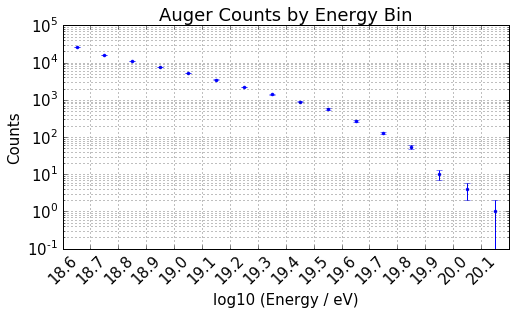

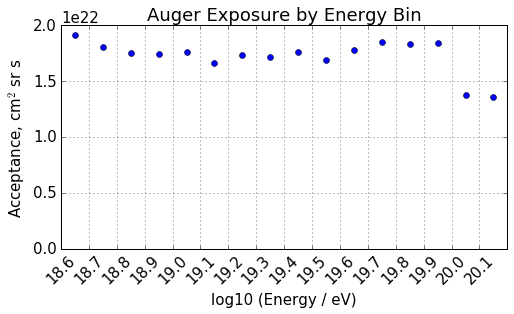

In [2]:
# A demonstration of reading and plotting the Auger data
import Auger_Data

# use Poisson uncertianties
from scipy.stats import poisson
# set to 68% interval of "1-sigma" in Gaussian parlance.
p_interval =  poisson.interval(0.68, Auger_Data.Counts)

#print p_interval

figure(figsize=(8,4))
ax = subplot(111)
ax.set_yscale('log')
cut = Auger_Data.Counts>0.
errorbar(Auger_Data.log10_Energy_low_edges[cut] + Auger_Data.d_log10_E/2., 
         Auger_Data.Counts[cut], 
         #xerr = 0.05,
         yerr=[Auger_Data.Counts[cut]-p_interval[0][cut], p_interval[1][cut]-Auger_Data.Counts[cut]], 
         fmt='.')
ylim(0.1, 1.e5)
xticks(np.arange(18.6, 20.2, 0.1), rotation=45)
grid(True, which='both')
ylabel('Counts')
xlabel('log10 (Energy / eV)')
title('Auger Counts by Energy Bin')

figure(figsize=(8,4))
ax = subplot(111)
#ax.set_yscale('log')
plot(Auger_Data.log10_Energy_low_edges[cut] + Auger_Data.d_log10_E/2., Auger_Data.Exposure[cut], 'o')
#ylim(0.5, 1.e4)
xticks(np.arange(18.6, 20.2, 0.1), rotation=45)
grid(True, which='both')
ylabel('Acceptance, cm$^2$ sr s')
xlabel('log10 (Energy / eV)')
title('Auger Exposure by Energy Bin')
y1, y2 = ax.get_ylim()
ylim(0.,y2)


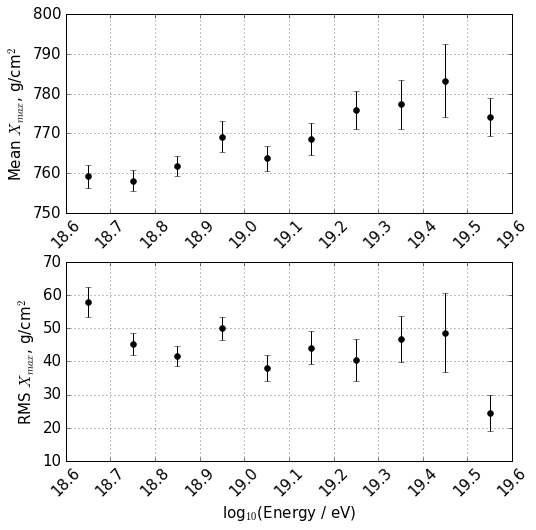

In [3]:
# A demonstration of plotting the mean Xmax and rms Xmax data

figure(figsize=(8,8))
subplot(211)
errorbar(Auger_Data.X_max_log10_E_low_edge + Auger_Data.d_log10_E/2.,
        Auger_Data.X_max_Mean, 
        yerr= Auger_Data.X_max_Mean_err,
        fmt = 'ko')
grid(True)
xticks(np.arange(18.6, 19.7, 0.1), rotation=45)
xlim(18.6, 19.6)
ylabel('Mean $X_{max}$, g/cm$^2$')
ylim(750., 800.)

subplot(212)
errorbar(Auger_Data.X_max_log10_E_low_edge + Auger_Data.d_log10_E/2.,
        Auger_Data.X_max_RMS, 
        yerr= Auger_Data.X_max_RMS_err,
        fmt = 'ko')
grid(True)
xticks(np.arange(18.6, 19.7, 0.1), rotation=45)
xlim(18.6, 19.6)
ylabel('RMS $X_{max}$, g/cm$^2$')
xlabel('log$_{10}$(Energy / eV)')
subplots_adjust(hspace=0.25)


In [4]:
# Plotting neutrino acceptances